# TIME GENERALIZATION

#### Explanation of the Code

In the following code, we perform the following tasks:<br>

- Import necessary libraries.<br>
- Load the dataset using pandas.<br>
- Clean the data by removing missing values and unnecesary variables.<br>
- Conduct statistical analysis using pingouin library.<br>

You run each individual cell by Ctrl+Enter.<br>
Throughout the code, you will have to adjust names of variables to match your experiment.


In [1]:
# Install required libraries if not already installed
# run this the first time you run the code, then you can use the second cell instead 
try:
    import pandas as pd
except ImportError:
    print("Pandas not found. Installing...")
    !pip install pandas
    import pandas as pd

try:
    import glob
except ImportError:
    print("Glob not found. Installing...")
    !pip install glob2
    import glob

try:
    import seaborn as sns
except ImportError:
    print("Seaborn not found. Installing...")
    !pip install seaborn
    import seaborn as sns

try:
    import pingouin as pg
except ImportError:
    print("Pingouin not found. Installing...")
    !pip install pingouin
    import pingouin as pg

try:
    import matplotlib.pyplot as plt
except ImportError:
    print("Matplotlib.pyplot not found. Installing...")
    !pip install matplotlib
    import matplotlib.pyplot as plt
    
try:
    import numpy as np
except ImportError:
    print("Numpy not found. Installing...")
    !pip install numpy
    import numpy as np


C:\Users\Admin\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
C:\Users\Admin\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.11, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [98]:
#import required libraries

import pandas as pd
import glob
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
import numpy as np

## 1. CREATE DATA FRAME

#### Explanation of the Code
In this section:<br>
    - data will be loaded into one dataframe<br> 
    - unnecessary lines and columns will be removed<br>
    - data will be reformated to match the needs of our statistical analysis


### collect logs into one file

In [57]:
# specify folder as file_path, make sure all the logs are in the folder
# this cell creates a data frame containing all data you collected

file_paths = glob.glob("C:/experimentalni psychologie/data exp00/data/*.csv") + glob.glob("C:/experimentalni psychologie/data exp00/data/*.xlsx")
dataframes = [pd.read_csv(file) if file.endswith(".csv") else pd.read_excel(file) for file in file_paths]

combined_df = pd.concat(dataframes, ignore_index=True)

In [58]:
# Set display options to show more rows and columns
pd.set_option('display.max_rows', None)  # Set to None to display all rows
pd.set_option('display.max_columns', None)  # Set to None to display all columns

# function .describe() generates descriptive statistics for each column
combined_df.describe()

duration     feedback   noFeedback  training.thisRepN  \
count  3970.000000  3970.000000  3970.000000              310.0   
mean      1.000000     0.531486     0.546599                0.0   
std       0.334706     0.499070     0.497886                0.0   
min       0.400000     0.000000     0.000000                0.0   
25%       0.800000     0.000000     0.000000                0.0   
50%       1.000000     1.000000     1.000000                0.0   
75%       1.200000     1.000000     1.000000                0.0   
max       1.600000     1.000000     1.000000                0.0   

       training.thisTrialN  training.thisN  training.thisIndex  \
count           310.000000      310.000000          310.000000   
mean              4.500000        4.500000            4.500000   
std               2.876925        2.876925            2.876925   
min               0.000000        0.000000            0.000000   
25%               2.000000        2.000000            2.000000   
50%               4.500000        4.500000            4.500000   
75%               7.000000        7.000000            7.000000   
max               9.000000        9.000000            9.000000   

       blockSelector.thisRepN  blockSelector.thisTrialN  blockSelector.thisN  \
count                  4026.0               4026.000000          4026.000000   
mean                      0.0                  0.491803             0.491803   
std                       0.0                  0.499995             0.499995   
min                       0.0                  0.000000             0.000000   
25%                       0.0                  0.000000             0.000000   
50%                       0.0                  0.000000             0.000000   
75%                       0.0                  1.000000             1.000000   
max                       0.0                  1.000000             1.000000   

       blockSelector.thisIndex  Blocks.thisRepN  Blocks.thisTrialN  \
count              4026.000000           4026.0        4026.000000   
mean                  0.491803              0.0           2.500000   
std                   0.499995              0.0           1.708037   
min                   0.000000              0.0           0.000000   
25%                   0.000000              0.0           1.000000   
50%                   0.000000              0.0           2.500000   
75%                   1.000000              0.0           4.000000   
max                   1.000000              0.0           5.000000   

       Blocks.thisN  Blocks.thisIndex  instructionStress.thisRepN  \
count   4026.000000       4026.000000                         0.0   
mean       2.500000          2.500000                         NaN   
std        1.708037          1.708037                         NaN   
min        0.000000          0.000000                         NaN   
25%        1.000000          1.000000                         NaN   
50%        2.500000          2.500000                         NaN   
75%        4.000000          4.000000                         NaN   
max        5.000000          5.000000                         NaN   

       instructionStress.thisTrialN  instructionStress.thisN  \
count                           0.0                      0.0   
mean                            NaN                      NaN   
std                             NaN                      NaN   
min                             NaN                      NaN   
25%                             NaN                      NaN   
50%                             NaN                      NaN   
75%                             NaN                      NaN   
max                             NaN                      NaN   

       instructionStress.thisIndex  instructionAccuracy.thisRepN  \
count                          0.0                           0.0   
mean                           NaN                           NaN   
std                            NaN                      

In [15]:
# save as csv (to back up or manually open in excel if needed)

combined_df.to_csv("combined_df.csv")

In [4]:
### YOU MAY SKIP THIS STEP IF YOU DO NOT USE RANDOMIZER TO ASSIGN SUBJETS TO GROUPS

# Fill missing 'stress' and 'accuracy' values within each participant group 
# (replace 'stress' and 'accuracy' by the names of your between factors assigned via randomizer in psychopy, if relevant)

combined_df['stress'] = combined_df.groupby('participant')['stress'].transform('first')
combined_df['accuracy'] = combined_df.groupby('participant')['accuracy'].transform('first')


In [5]:
#automatically remove redundant columns 

# check and edit List of column names to select ('selected columns' right bellow), so all data you need or want gets to the final data frame)
# We want to include all your independent variables (in case of this list it is the feedback/noFeedback and stress/accuracy)
# We want to keep the record of durations and correct responses
# trial or block numbers are recorded here as Blocks.thisTrialN and BlockThisTrialN, this will have different names too
# i would keep the response times for te trials (key_respBorN.keys)
# make sure you keep the participant data too (all the variables you ask your subject to fill in in the start of exp.)

### you might perform this step in excel as well, on the comnined_df.csv you created in previous step 

selected_columns = [
    'duration', 'corrAns', 'feedback', 'noFeedback',
    'Blocks.thisTrialN', 'Block.thisTrialN', 'thisRow.t',
    'stress', 'accuracy', 'polygonBlackSquare.started',
    'polygonBlackSquare.stopped', 'key_respBorN.keys',
    'key_respBorN.corr', 'key_respBorN.rt', 'participant',
    'session', 'gender', 'age', 'date', 'expName', 'frameRate'
]

# Creating a new DataFrame with selected columns
new_df = combined_df[selected_columns]

# Removing rows where 'duration' is not recorded (contains NaN) - to get rid of lines that were not part of the experiment
new_df = new_df.dropna(subset=['duration'])

# Display the new DataFrame
print(new_df)


      duration corrAns  feedback  noFeedback  Blocks.thisTrialN  \
3          1.0       b       1.0         1.0                NaN   
4          1.4       n       1.0         1.0                NaN   
5          0.8       n       1.0         1.0                NaN   
6          1.2       n       1.0         1.0                NaN   
7          0.6       n       1.0         1.0                NaN   
8          1.0       b       1.0         1.0                NaN   
9          1.6       n       1.0         1.0                NaN   
10         0.4       n       1.0         1.0                NaN   
11         1.0       b       1.0         1.0                NaN   
12         1.0       b       1.0         1.0                NaN   
14         1.0       b       1.0         0.0                0.0   
15         0.8       n       1.0         0.0                0.0   
16         1.6       n       1.0         0.0                0.0   
17         0.6       n       1.0         0.0                0.

In [59]:
#see the descriptive statistics

"""
you might notice, that there is different count of lines for certain variables,
that is because the current data frame still contains training data from the first 10 trials, which we will not use
in analysis.
"""

new_df.describe()

duration     feedback   noFeedback  Blocks.thisTrialN  \
count  3970.000000  3970.000000  3970.000000        3660.000000   
mean      1.000000     0.531486     0.546599           2.500000   
std       0.334706     0.499070     0.497886           1.708058   
min       0.400000     0.000000     0.000000           0.000000   
25%       0.800000     0.000000     0.000000           1.000000   
50%       1.000000     1.000000     1.000000           2.500000   
75%       1.200000     1.000000     1.000000           4.000000   
max       1.600000     1.000000     1.000000           5.000000   

       Block.thisTrialN    thisRow.t       stress     accuracy  \
count       3660.000000  3190.000000  3970.000000  3970.000000   
mean           4.500000   822.508560     0.508816     0.491184   
std            2.872674   513.838015     0.499985     0.499985   
min            0.000000    16.804299     0.000000     0.000000   
25%            2.000000   423.853637     0.000000     0.000000   
50%            4.500000   778.587560     1.000000     0.000000   
75%            7.000000  1129.203657     1.000000     1.000000   
max            9.000000  2888.305986     1.000000     1.000000   

       polygonBlackSquare.started  polygonBlackSquare.stopped  \
count                 3970.000000                 3737.000000   
mean                   822.786131                  822.294845   
std                    510.244398                  506.954596   
min                     21.803918                   22.603816   
25%                    425.300627                  422.450474   
50%                    768.016886                  771.713663   
75%                   1129.501967                 1134.968601   
max                   2887.007361                 2887.606766   

       key_respBorN.corr  key_respBorN.rt    participant  session          age  
count        3970.000000      3970.000000    3970.000000   3970.0  3970.000000  
mean            0.721914         2.143765  510877.241814      1.0    22.571788  
std             0.448112         9.960116  297669.714063      0.0     1.832769  
min             0.000000       -21.765640   27171.000000      1.0    21.000000  
25%             0.000000         1.427680  231280.000000      1.0    21.000000  
50%             1.000000         1.715066  572697.000000      1.0    22.000000  
75%             1.000000         2.062051  776689.000000      1.0    23.000000  
max             1.000000       525.046891  954504.000000      1.0    30.000000

In [25]:
#save the final data frame to backup and/or inspect in excel
new_df.to_csv('new_df.csv')

In [7]:
# now remove the training data
"""
you may probably have to replace 'Block.thisTrialN' with 'Trials.thisTrialN' or whatever name 
has your variable indicating the number of trial or block of trials, 
as those would have missing values during the training phase, 
so the lines containing data from training will be removed
"""

new_df01 = new_df.dropna(subset=['Block.thisTrialN'])
display(new_df01.describe())

# .head() displays first couple of lines of a data frame
display(new_df01.head())

# now the count should be equal for all variables 
# (in my case there are some missing data in thisRow.t, a variable indicating cumulative time at each trial, some logs just lack this measure)

duration     feedback   noFeedback  Blocks.thisTrialN  \
count  3660.00000  3660.000000  3660.000000        3660.000000   
mean      1.00000     0.491803     0.508197           2.500000   
std       0.33471     0.500001     0.500001           1.708058   
min       0.40000     0.000000     0.000000           0.000000   
25%       0.80000     0.000000     0.000000           1.000000   
50%       1.00000     0.000000     1.000000           2.500000   
75%       1.20000     1.000000     1.000000           4.000000   
max       1.60000     1.000000     1.000000           5.000000   

       Block.thisTrialN    thisRow.t       stress     accuracy  \
count       3660.000000  2940.000000  3660.000000  3660.000000   
mean           4.500000   881.909375     0.508197     0.491803   
std            2.872674   489.360304     0.500001     0.500001   
min            0.000000   134.162586     0.000000     0.000000   
25%            2.000000   501.800691     0.000000     0.000000   
50%            4.500000   831.992258     1.000000     0.000000   
75%            7.000000  1156.342792     1.000000     1.000000   
max            9.000000  2888.305986     1.000000     1.000000   

       polygonBlackSquare.started  polygonBlackSquare.stopped  \
count                 3660.000000                 3435.000000   
mean                   881.497263                  883.192060   
std                    486.463570                  481.795163   
min                    133.079389                  133.479205   
25%                    500.648925                  505.325067   
50%                    824.594573                  830.235921   
75%                   1158.421877                 1164.331134   
max                   2887.007361                 2887.606766   

       key_respBorN.corr  key_respBorN.rt    participant  session          age  
count        3660.000000      3660.000000    3660.000000   3660.0  3660.000000  
mean            0.730601         2.056278  511267.672131      1.0    22.573770  
std             0.443708         9.550355  297657.221711      0.0     1.833093  
min             0.000000       -21.765640   27171.000000      1.0    21.000000  
25%             0.000000         1.415446  231280.000000      1.0    21.000000  
50%             1.000000         1.695342  572697.000000      1.0    22.000000  
75%             1.000000         2.020344  776689.000000      1.0    23.000000  
max             1.000000       525.046891  954504.000000      1.0    30.000000

duration corrAns  feedback  noFeedback  Blocks.thisTrialN  \
14       1.0       b       1.0         0.0                0.0   
15       0.8       n       1.0         0.0                0.0   
16       1.6       n       1.0         0.0                0.0   
17       0.6       n       1.0         0.0                0.0   
18       1.4       n       1.0         0.0                0.0   

    Block.thisTrialN   thisRow.t  stress  accuracy  \
14               0.0  160.033362     1.0       0.0   
15               1.0  167.613858     1.0       0.0   
16               2.0  175.680219     1.0       0.0   
17               3.0  183.186162     1.0       0.0   
18               4.0  191.197483     1.0       0.0   

    polygonBlackSquare.started  polygonBlackSquare.stopped key_respBorN.keys  \
14                  157.854946                  158.853922                 b   
15                  166.022553                  166.821131                 b   
16                  173.605768                  175.204885                 n   
17                  181.671835                  182.271339                 b   
18                  189.171992                  190.571622                 n   

    key_respBorN.corr  key_respBorN.rt  participant  session gender   age  \
14                1.0         2.165862      27171.0      1.0   Male  24.0   
15                0.0         1.575449      27171.0      1.0   Male  24.0   
16                1.0         2.058987      27171.0      1.0   Male  24.0   
17                0.0         1.497676      27171.0      1.0   Male  24.0   
18                1.0         2.010307      27171.0      1.0   Male  24.0   

                       date                 expName frameRate  
14  2023-10-16_09h41.06.754  time_generalization_00   120.706  
15  2023-10-16_09h41.06.754  time_generalization_00   120.706  
16  2023-10-16_09h41.06.754  time_generalization_00   120.706  
17  2023-10-16_09h41.06.754  time_generalization_00   120.706  
18  2023-10-16_09h41.06.754  time_generalization_00   120.706

## 2. STATISTICAL ANALYSIS

#### Explanation of the Code

In the following section, we perform the following tasks:<br>

- calculate response ratios.<br>
- Load the dataset using pandas.<br>
- Clean the data by removing missing values and unnecesary variables.<br>
- Conduct statistical analysis using pingouin library.<br>

You run each individual cell by Ctrl+Enter.<br>
Throughout the code, you will have to adjust names of variables to match your experiment.


### new df for anova

In [84]:
#create new data frame with response ratios using the dataframe called new_df01 with your data

""""
Create a pivot table to calculate the counts of 'b' and 'n' for each group

we need to make the counts for each participant at each duration at each condition, 
so edit the code to contain your independent variables
my independent variables were 'feedback' and 'stress'
keep the variables 'duration' and 'participant' in the list
"""

pivot_table = new_df01.pivot_table(index=['duration', 'feedback', 'participant','stress'], columns='key_respBorN.keys', 
                                   aggfunc='size', fill_value=0)

# Calculate the Response Ratio (count of 'b' / count of 'n') for each group
pivot_table['Response_Ratio'] = pivot_table['b'] / (pivot_table['b'] + pivot_table['n'])

# Reset the index to have a new dataframe with the specified columns
result_df = pivot_table.reset_index()

# If you want to replace any NaN values with 0, you can use fillna method
result_df.fillna(0, inplace=True)

# If you want to save this new dataframe to a CSV file, you can use:
#result_df.to_csv("response_ratios.csv", index=False)


In [85]:
result_df

key_respBorN.keys  duration  feedback  participant  stress   b   n  \
0                       0.4       0.0      27171.0     1.0   1   5   
1                       0.4       0.0      80551.0     0.0   1   5   
2                       0.4       0.0      96604.0     1.0   0   6   
3                       0.4       0.0     124367.0     0.0   2   4   
4                       0.4       0.0     135784.0     0.0   1   5   
5                       0.4       0.0     144507.0     0.0   0   6   
6                       0.4       0.0     195972.0     0.0   1   5   
7                       0.4       0.0     201266.0     1.0   0   6   
8                       0.4       0.0     231280.0     0.0   0   6   
9                       0.4       0.0     247059.0     1.0   0   6   
10                      0.4       0.0     341031.0     0.0   0   6   
11                      0.4       0.0     344553.0     1.0   0   6   
12                      0.4       0.0     379479.0     1.0   0   6   
13                      0.4       0.0     427694.0     1.0   0   6   
14                      0.4       0.0     475207.0     0.0   4   2   
15                      0.4       0.0     572697.0     1.0   1   5   
16                      0.4       0.0     573178.0     1.0   0   6   
17                      0.4       0.0     590401.0     0.0   0   6   
18                      0.4       0.0     612161.0     1.0   1   5   
19                      0.4       0.0     661427.0     1.0   0   6   
20                      0.4       0.0     706068.0     1.0   0   6   
21                      0.4       0.0     716849.0     1.0   0   6   
22                      0.4       0.0     763498.0     0.0   1   5   
23                      0.4       0.0     776689.0     0.0   0   6   
24                      0.4       0.0     827411.0     0.0   0   6   
25                      0.4       0.0     853026.0     0.0   0   6   
26                      0.4       0.0     883636.0     1.0   0   6   
27                      0.4       0.0     906239.0     1.0   0   6   
28                      0.4       0.0     909153.0     1.0   0   6   
29                      0.4       0.0     934835.0     0.0   0   6   
30                      0.4       0.0     954504.0     0.0   0   6   
31                      0.4       1.0      27171.0     1.0   1   5   
32                      0.4       1.0      80551.0     0.0   4   2   
33                      0.4       1.0      96604.0     1.0   0   6   
34                      0.4       1.0     124367.0     0.0   0   6   
35                      0.4       1.0     135784.0     0.0   2   4   
36                      0.4       1.0     144507.0     0.0   0   6   
37                      0.4       1.0     195972.0     0.0   1   5   
38                      0.4       1.0     231280.0     0.0   2   4   
39                      0.4       1.0     247059.0     1.0   0   6   
40                      0.4       1.0     341031.0     0.0   0   6   
41                      0.4       1.0     344553.0     1.0   0   6   
42                      0.4       1.0     379479.0     1.0   0   6   
43                      0.4       1.0     427694.0     1.0   0   6   
44                      0.4       1.0     475207.0     0.0   4   2   
45                      0.4       1.0     572697.0     1.0   0   6   
46                      0.4       1.0     573178.0     1.0   0   6   
47                      0.4       1.0     590401.0     0.0   0   6   
48                      0.4       1.0     612161.0     1.0   0   6   
49                      0.4       1.0     661427.0     1.0   0   6   
50                      0.4       1.0     706068.0     1.0   0   6   
51                      0.4       1.0     716849.0     1.0   0   6   
52                      0.4       1.0     763498.0     0.0   0   6   
53                      0.4       1.0     776689.0     0.0   0   6   
54                      0.4       1.0     827411.0     0.0   0   6   
55                      0.4       1.0     853026.0     0.0   0   6   
56        

### plot the temporal generalization gradients

<AxesSubplot:xlabel='duration', ylabel='Response_Ratio'>

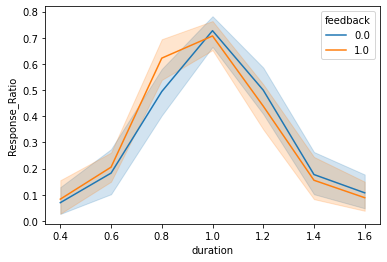

In [10]:
# here I use my within factor 'feedback' as hue to observe the distinct gradients in one plot

sns.lineplot(data=result_df, x="duration", y="Response_Ratio", hue="feedback")

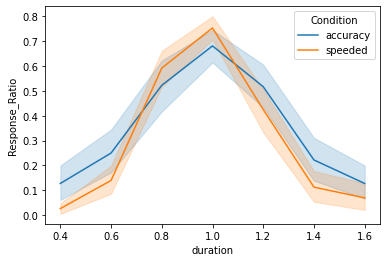

In [12]:
# here I use my between factor 'stress' as hue to observe the distinct gradients in one plot 

sns.lineplot(data=result_df, x="duration", y="Response_Ratio", hue="stress")

# Customizing the legend labels
new_legend_labels = ['accuracy', 'speeded']  # Replace with your desired labels
plt.legend(title='Condition', labels=new_legend_labels)

### perform repeated measures anova on your within factor and duration

In [13]:
#perform anova
pg.rm_anova(data=result_df, within=['duration', 'feedback'], dv='Response_Ratio', subject='participant')

Source         SS  ddof1  ddof2        MS          F  \
0             duration  23.819490      6    180  3.969915  71.448161   
1             feedback   0.003903      1     30  0.003903   0.142998   
2  duration * feedback   0.350822      6    180  0.058470   2.980958   

          p-unc     p-GG-corr       np2       eps  
0  5.014612e-45  3.640200e-27  0.704282  0.580530  
1  7.079815e-01  7.079815e-01  0.004744  1.000000  
2  8.443167e-03  1.605949e-02  0.090384  0.773365

In [17]:
#perform pairwise t-tests
""""
to be able to perform this test, we need to have same number of elements in all conditions, 
In my case, I found one participant that was causing error, as he/she completed only halve of the experiment
I found it using the code in the cell bellow, hope you might not need it
"""

# run pairwise ttest
a = pg.pairwise_ttests(data=result_df, within=['duration','feedback'], dv='Response_Ratio', subject='participant', effsize = 'cohen')

# you might want to see only significant results, and only those for interaction of feedback*duration
display(a[(a["p-unc"] < 0.05) & (a["Contrast"] == 'duration * feedback')])


Contrast duration  A  B Paired  Parametric         T   dof  \
24  duration * feedback      0.8  0  1   True        True -3.026201  29.0   

         Tail     p-unc   BF10     cohen  
24  two-sided  0.005151  7.933 -0.547723

In [15]:
# SKIP THIS UNLESS YOU HAVE AN ERROR RUNNING PREVIOUS CELL

"""
If you did have error about uneven size of the ttest groups,
check the sizes customizing the code bellow
"""

result_df.groupby(['participant', 'duration']).size()

participant  duration
27171.0      0.4         2
             0.6         2
             0.8         2
             1.0         2
             1.2         2
             1.4         2
             1.6         2
80551.0      0.4         2
             0.6         2
             0.8         2
             1.0         2
             1.2         2
             1.4         2
             1.6         2
96604.0      0.4         2
             0.6         2
             0.8         2
             1.0         2
             1.2         2
             1.4         2
             1.6         2
124367.0     0.4         2
             0.6         2
             0.8         2
             1.0         2
             1.2         2
             1.4         2
             1.6         2
135784.0     0.4         2
             0.6         2
             0.8         2
             1.0         2
             1.2         2
             1.4         2
             1.6         2
144507.0     0.4         2
      

In [16]:
# SKIP THIS TOO, UNLESS YOU WANT TO REMOVE A PARTICIPANT FROM THE RESULT_DF

# we create a subset of the data, excluding participant with incomplete experiment (SKIP THIS AT FIRST)
result_df = result_df[result_df['participant'] != 201266]

In [44]:
"""
as we are performing multiple comparisons, we should make sure we aplly p correction,
if not applied during testing, you can calculate the desired alpha after bonferroni correction manually
"""

def calculate_num_comparisons(levels_factor1, levels_factor2):
    return levels_factor1 * levels_factor2

def calculate_corrected_alpha(desired_fwer, num_comparisons):
    return desired_fwer / num_comparisons

# Example usage:
levels_factor1 = 2  # Number of levels in the first factor (feedback)
levels_factor2 = 7  # Number of levels in the second factor (duration)
desired_fwer = 0.05  # Desired family-wise error rate

num_comparisons = calculate_num_comparisons(levels_factor1, levels_factor2)
corrected_alpha = calculate_corrected_alpha(desired_fwer, num_comparisons)

print(f"Number of comparisons: {num_comparisons}")
print(f"Bonferroni-corrected alpha: {corrected_alpha}")

Number of comparisons: 14
Bonferroni-corrected alpha: 0.0035714285714285718


### perform ANOVA on your between factor

In [34]:
"""
as we measured the influence of our between factor various times in a participant (in distinct durations),
mixed anova (version of anova taking account of both within and between factors) should be performed
to figure out if there were significant differences in between the groups at specific durations
"""

pg.mixed_anova(data=result_df, dv='Response_Ratio', within='duration', subject='participant',
               between='stress', correction='auto', effsize='np2')


Source         SS  DF1  DF2        MS          F         p-unc  \
0       stress   0.135450    1   28  0.135450   2.912804  9.894785e-02   
1     duration  11.571164    6  168  1.928527  72.909997  3.275818e-44   
2  Interaction   0.326124    6  168  0.054354   2.054912  6.112024e-02   

      p-GG-corr       np2       eps sphericity   W-spher       p-spher  
0           NaN  0.094226       NaN        NaN       NaN           NaN  
1  5.229457e-25  0.722525  0.543752      False  0.041662  6.501134e-10  
2           NaN  0.068372       NaN        NaN       NaN           NaN

In [35]:
#perform pairwise t-tests
""""
to be able to perform this test, we need to have same number of elements in all conditions, 
see the section above if having issues with the balance of the sample error...
"""

# run pairwise ttest
a = pg.pairwise_ttests(data=result_df, within='duration', dv='Response_Ratio', subject='participant', between = 'stress', effsize = 'cohen')
# you might want to see only significant results, and only those for interaction of feedback*duration
display(a[(a["p-unc"] < 0.05) & (a["Contrast"] == 'duration * stress')])



Contrast duration  A  B Paired  Parametric         T   dof  \
22  duration * stress      0.4  0  1  False        True  2.465283  58.0   
23  duration * stress      0.6  0  1  False        True  2.100154  58.0   

         Tail     p-unc   BF10     cohen  
22  two-sided  0.016672  3.156  0.636533  
23  two-sided  0.040075   1.62  0.542257

In [42]:
""""
as we are performing multiple comparisons, we should make sure we aplly p correction,
if not applied during testing, you can calculate the desired alpha after bonferroni correction manually
""""

def calculate_num_comparisons(levels_factor1, levels_factor2):
    return levels_factor1 * levels_factor2

def calculate_corrected_alpha(desired_fwer, num_comparisons):
    return desired_fwer / num_comparisons

# Example usage:
levels_factor1 = 2  # Number of levels in the first factor (stress)
levels_factor2 = 7  # Number of levels in the second factor (duration)
desired_fwer = 0.05  # Desired family-wise error rate

num_comparisons = calculate_num_comparisons(levels_factor1, levels_factor2)
corrected_alpha = calculate_corrected_alpha(desired_fwer, num_comparisons)

print(f"Number of comparisons: {num_comparisons}")
print(f"Bonferroni-corrected alpha: {corrected_alpha}")


Number of comparisons: 14
Bonferroni-corrected alpha: 0.0035714285714285718


In [ ]:
#now you can check if the results of posthoc testing stand significant against the bonferroni-corrected alpha

### calculate weighted mean gradient


In [47]:
# Assuming you have the 'result_df' dataframe from the previous step

"""
We are replicating a procedure from Klapproth and Wearden, 2011
Here is citation from the paper, describing the construction of the parameter:

In order to numerically examine the shift of the
gradients, we calculated the weighted mean of the
gradient of each participant. 
This was done by 
[1]multiplying the number of “same” responses with the
duration at which a “same” response was given,
[2] adding these products, 
and then 
[4] dividing this weighted sum by the number of “same” responses
of each participant given at all durations (calculated at step [3] in our case)
"""


# [1] Calculate the weighted sum for each participant and duration combination (result_df already contains number of same responses as variable 'b')

result_df['Weighted_Sum'] = result_df['b'] * result_df['duration']

# [2] Add the weighted sums to have a total for each combination of participant and values of your independent variables
""""
You will need to replace my independent variables by yours.
Keep the participant in the list, though.
"""
grouped = result_df.groupby(['participant', 'feedback','stress'])['Weighted_Sum'].sum().reset_index()

# [3] Calculate the total count of "b" responses for each participant and feedback combination
grouped['Total_b_Responses'] = result_df.groupby(['participant', 'feedback'])['b'].transform('sum')

# [4] Calculate the weighted mean of the gradient for each participant and feedback combination
grouped['Weighted_Mean_Gradient'] = grouped['Weighted_Sum'] / grouped['Total_b_Responses']

# If you want to save this new dataframe to a CSV file, you can use:
#grouped.to_csv("weighted_mean_gradient.csv", index=False)



### plot results and test your hypotheses

<AxesSubplot:xlabel='stress', ylabel='Weighted_Mean_Gradient'>

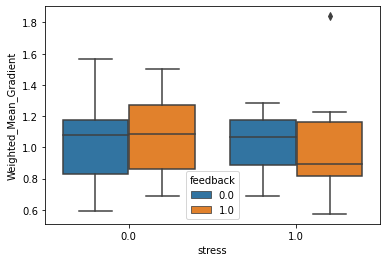

In [48]:
# create boxplot supporting your analysis
"""
As I had two variables, I display on x and the other as hue, if you have less variables, use just x
"""
sns.boxplot(data=grouped, x="stress", y="Weighted_Mean_Gradient", hue="feedback")

<AxesSubplot:xlabel='stress', ylabel='Weighted_Mean_Gradient'>

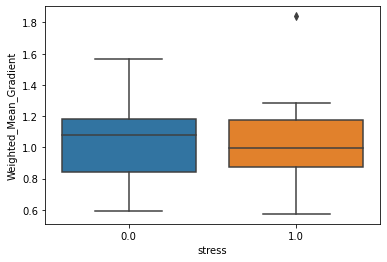

In [49]:
sns.boxplot(data=grouped, x="stress", y="Weighted_Mean_Gradient")

<AxesSubplot:xlabel='feedback', ylabel='Weighted_Mean_Gradient'>

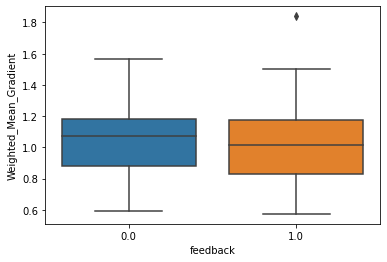

In [50]:
sns.boxplot(data=grouped, x="feedback", y="Weighted_Mean_Gradient")

### ANOVA
In this section we will test our hypotheses using the Weighted_Mean_Gradient as our dependent variable.<br>
Choose a version of ANOVA, congruent with your design.
    

In [59]:
# use this for within subject designs
pg.rm_anova(data=grouped, dv="Weighted_Mean_Gradient", within=["feedback"], subject="participant")

Source  ddof1  ddof2       F     p-unc       np2  eps
0  feedback      1     28  0.0039  0.950645  0.000139  1.0

In [62]:
# use this for mixed designs
pg.mixed_anova(data=grouped, dv="Weighted_Mean_Gradient", within="feedback", between ='stress', subject="participant")

Source        SS  DF1  DF2        MS         F     p-unc       np2  \
0       stress  0.014358    1   27  0.014358  0.160084  0.692227  0.005894   
1     feedback  0.000226    1   27  0.000226  0.003812  0.951226  0.000141   
2  Interaction  0.021490    1   27  0.021490  0.362350  0.552226  0.013243   

   eps  
0  NaN  
1  1.0  
2  NaN

In [65]:
# use this for between subject designs
pg.anova(data=grouped, dv="Weighted_Mean_Gradient", between ='stress')

Source  ddof1  ddof2         F     p-unc       np2
0  stress      1     57  0.225555  0.636654  0.003942

In [58]:
# generate mean values for each condition
"""
edit to calculate weighted mean gradients for each condition
this is the proxy of how long the second lasted for the given situation
"""

mean_A = grouped[(grouped["stress"]==0)&(grouped["feedback"]==0)]["Weighted_Mean_Gradient"].mean()
mean_B = grouped[(grouped["stress"]==0)&(grouped["feedback"]==1)]["Weighted_Mean_Gradient"].mean()
mean_C = grouped[(grouped["stress"]==1)&(grouped["feedback"]==0)]["Weighted_Mean_Gradient"].mean()
mean_D = grouped[(grouped["stress"]==1)&(grouped["feedback"]==1)]["Weighted_Mean_Gradient"].mean()

#mean_A
#mean_B
print([mean_A, mean_B, mean_C, mean_D])

[1.0321791542242609, 1.0716820718544977, 1.03491869257555, 1.0016745070050221]


### TTESTS

T        dof       tail    p-val          CI95%   cohen-d  \
T-test  0.474301  56.308142  two-sided  0.63712  [-0.11, 0.17]  0.123678   

        BF10     power  
T-test  0.29  0.075333

WMG under accuracy condition: 1.0512495282526513
WMG under speeded condition: 1.0182965997902862
mean difference: 0.03295292846236508


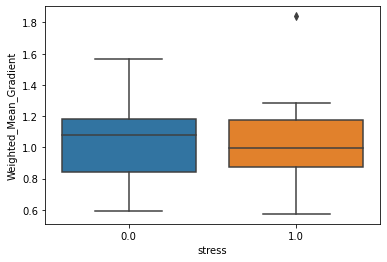

In [54]:
#ttest for between factor
x = grouped[(grouped["stress"]==0)]["Weighted_Mean_Gradient"]
y = grouped[(grouped["stress"]==1)]["Weighted_Mean_Gradient"]
display(pg.ttest(x,y, paired=False))
sns.boxplot(data=grouped, x="stress", y="Weighted_Mean_Gradient")
print("WMG under accuracy condition:", x.mean())
print("WMG under speeded condition:", y.mean())
mean_diff = x.mean() - y.mean()
print("mean difference:", mean_diff)



T        dof       tail     p-val          CI95%   cohen-d  \
T-test -0.027567  54.599328  two-sided  0.978108  [-0.14, 0.14]  0.007201   

         BF10     power  
T-test  0.264  0.050085

WMG under no-feedback condition: 1.0335489233999058
WMG under feedback condition: 1.0354712624495965
mean difference: -0.0019223390496907466


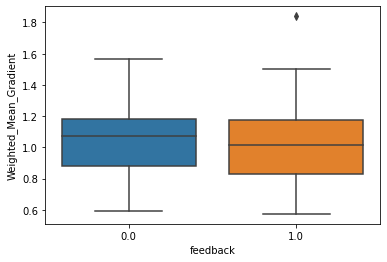

In [55]:
#ttest for within factor
x = grouped[(grouped["feedback"]==0)]["Weighted_Mean_Gradient"]
y = grouped[(grouped["feedback"]==1)]["Weighted_Mean_Gradient"]
display(pg.ttest(x,y, paired=False))
sns.boxplot(data=grouped, x="feedback", y="Weighted_Mean_Gradient")
print("WMG under no-feedback condition:", x.mean())
print("WMG under feedback condition:", y.mean())
mean_diff = x.mean() - y.mean()
print("mean difference:", mean_diff)

## 3. ANALYSIS TAKING ACCOUNT OF BLOCK NUMBER

### FOR BETWEEN FACTOR AND BLOCK

In [86]:
#create new data frame with response ratios using the dataframe called new_df01 with your data you generated in the section 1

""""
Create a pivot table to calculate the counts of 'b' and 'n' for each group

we need to make the counts for each participant at each duration at each condition, 
so edit the code to contain your independent variables
my independent variables were 'stress' and the number of the block.
keep the variables 'duration' and 'participant' in the list
"""

pivot_table = new_df01.pivot_table(index=['duration', 'participant','stress', 'Blocks.thisTrialN'], columns='key_respBorN.keys', 
                                   aggfunc='size', fill_value=0)

# Calculate the Response Ratio (count of 'b' / count of 'n') for each group
pivot_table['Response_Ratio'] = pivot_table['b'] / (pivot_table['b'] + pivot_table['n'])

# Reset the index to have a new dataframe with the specified columns
result_df01 = pivot_table.reset_index()

# If you want to replace any NaN values with 0, you can use fillna method
result_df01.fillna(0, inplace=True)

# If you want to save this new dataframe to a CSV file, you can use:
#result_df01.to_csv("response_ratios.csv", index=False)


In [95]:
#rename Blocks.thisTrialN to 'block'
result_df01.rename(columns={'Blocks.thisTrialN': 'block'}, inplace=True)


In [83]:
result_df

key_respBorN.keys  duration  feedback  participant  stress  Blocks.thisTrialN  \
0                       0.4       0.0      27171.0     1.0                0.0   
1                       0.4       0.0      27171.0     1.0                1.0   
2                       0.4       0.0      27171.0     1.0                2.0   
3                       0.4       0.0      27171.0     1.0                3.0   
4                       0.4       0.0      27171.0     1.0                4.0   
5                       0.4       0.0      27171.0     1.0                5.0   
6                       0.4       0.0      80551.0     0.0                0.0   
7                       0.4       0.0      80551.0     0.0                1.0   
8                       0.4       0.0      80551.0     0.0                2.0   
9                       0.4       0.0      80551.0     0.0                3.0   
10                      0.4       0.0      80551.0     0.0                4.0   
11                      0.4       0.0      80551.0     0.0                5.0   
12                      0.4       0.0      96604.0     1.0                0.0   
13                      0.4       0.0      96604.0     1.0                1.0   
14                      0.4       0.0      96604.0     1.0                2.0   
15                      0.4       0.0      96604.0     1.0                3.0   
16                      0.4       0.0      96604.0     1.0                4.0   
17                      0.4       0.0      96604.0     1.0                5.0   
18                      0.4       0.0     124367.0     0.0                0.0   
19                      0.4       0.0     124367.0     0.0                1.0   
20                      0.4       0.0     124367.0     0.0                2.0   
21                      0.4       0.0     124367.0     0.0                3.0   
22                      0.4       0.0     124367.0     0.0                4.0   
23                      0.4       0.0     124367.0     0.0                5.0   
24                      0.4       0.0     135784.0     0.0                0.0   
25                      0.4       0.0     135784.0     0.0                1.0   
26                      0.4       0.0     135784.0     0.0                2.0   
27                      0.4       0.0     135784.0     0.0                3.0   
28                      0.4       0.0     135784.0     0.0                4.0   
29                      0.4       0.0     135784.0     0.0                5.0   
30                      0.4       0.0     144507.0     0.0                0.0   
31                      0.4       0.0     144507.0     0.0                1.0   
32                      0.4       0.0     144507.0     0.0                2.0   
33                      0.4       0.0     144507.0     0.0                3.0   
34                      0.4       0.0     144507.0     0.0                4.0   
35                      0.4       0.0     144507.0     0.0                5.0   
36                      0.4       0.0     195972.0     0.0                0.0   
37                      0.4       0.0     195972.0     0.0                1.0   
38                      0.4       0.0     195972.0     0.0                2.0   
39                      0.4       0.0     195972.0     0.0                3.0   
40                      0.4       0.0     195972.0     0.0                4.0   
41                      0.4       0.0     195972.0     0.0                5.0   
42                      0.4       0.0     201266.0     1.0                0.0   
43                      0.4       0.0     201266.0     1.0                1.0   
44                      0.4       0.0     201266.0     1.0                2.0   
45                      0.4       0.0     201266.0     1.0                3.0   
46                      0.4       0.0     201266.0     1.0                4.0   
47                      0.4       0.0     201266.0     1.0                5.0   
48                      0.4    

In [88]:
# Assuming you have the 'result_df01' dataframe from the previous step

"""
We are replicating a procedure from Klapproth and Wearden, 2011
Here is citation from the paper, describing the construction of the parameter:

In order to numerically examine the shift of the
gradients, we calculated the weighted mean of the
gradient of each participant. 
This was done by 
[1]multiplying the number of “same” responses with the
duration at which a “same” response was given,
[2] adding these products, 
and then 
[4] dividing this weighted sum by the number of “same” responses
of each participant given at all durations (calculated at step [3] in our case)
"""


# [1] Calculate the weighted sum for each participant and duration combination (result_df01 already contains number of same responses as variable 'b')

result_df01['Weighted_Sum'] = result_df01['b'] * result_df01['duration']

# [2] Add the weighted sums to have a total for each combination of participant and values of your independent variables
""""
You will need to replace my independent variables by yours.
Keep the participant in the list, though.
"""
grouped01 = result_df01.groupby(['participant','stress','block'])['Weighted_Sum'].sum().reset_index()

# [3] Calculate the total count of "b" responses for each participant and feedback combination
grouped01['Total_b_Responses'] = result_df01.groupby(['participant', 'block'])['b'].transform('sum')

# [4] Calculate the weighted mean of the gradient for each participant and feedback combination
grouped01['Weighted_Mean_Gradient'] = grouped01['Weighted_Sum'] / grouped01['Total_b_Responses']

# If you want to save this new dataframe to a CSV file, you can use:
#grouped01.to_csv("weighted_mean_gradient.csv", index=False)



In [94]:
#this data frame contains WMR calculated separately for each block under distinct conditions
#in the first itteration (grouped), there are two WMG values per participant, now there are 6
grouped01

participant  stress  block  Weighted_Sum  Total_b_Responses  \
0        27171.0     1.0    0.0           9.6                 11   
1        27171.0     1.0    1.0           6.2                  6   
2        27171.0     1.0    2.0           9.0                  8   
3        27171.0     1.0    3.0           8.8                  9   
4        27171.0     1.0    4.0           8.4                  8   
5        27171.0     1.0    5.0           8.0                  7   
6        80551.0     0.0    0.0           3.6                  3   
7        80551.0     0.0    1.0          10.2                 11   
8        80551.0     0.0    2.0           6.0                  7   
9        80551.0     0.0    3.0           4.2                  3   
10       80551.0     0.0    4.0           3.2                  4   
11       80551.0     0.0    5.0          12.6                 13   
12       96604.0     1.0    0.0           6.8                  7   
13       96604.0     1.0    1.0           4.8                  5   
14       96604.0     1.0    2.0           8.4                  8   
15       96604.0     1.0    3.0          10.0                 10   
16       96604.0     1.0    4.0           9.6                  9   
17       96604.0     1.0    5.0          11.2                 11   
18      124367.0     0.0    0.0           6.2                  7   
19      124367.0     0.0    1.0           4.8                  6   
20      124367.0     0.0    2.0          11.4                 11   
21      124367.0     0.0    3.0           9.2                  9   
22      124367.0     0.0    4.0           8.2                  8   
23      124367.0     0.0    5.0           7.6                  7   
24      135784.0     0.0    0.0           5.2                  5   
25      135784.0     0.0    1.0           8.0                  8   
26      135784.0     0.0    2.0          11.0                 12   
27      135784.0     0.0    3.0          14.2                 14   
28      135784.0     0.0    4.0          10.0                 12   
29      135784.0     0.0    5.0          11.4                 11   
30      144507.0     0.0    0.0           5.4                  5   
31      144507.0     0.0    1.0           9.8                 10   
32      144507.0     0.0    2.0          10.0                 10   
33      144507.0     0.0    3.0           8.2                  9   
34      144507.0     0.0    4.0           9.0                  9   
35      144507.0     0.0    5.0           9.8                 10   
36      195972.0     0.0    0.0           8.8                  9   
37      195972.0     0.0    1.0           9.2                 10   
38      195972.0     0.0    2.0           9.4                  9   
39      195972.0     0.0    3.0           6.6                  7   
40      195972.0     0.0    4.0           5.8                  6   
41      195972.0     0.0    5.0           9.0                 10   
42      201266.0     1.0    0.0           2.8                  2   
43      201266.0     1.0    1.0           4.4                  5   
44      201266.0     1.0    2.0           6.6                  6   
45      201266.0     1.0    3.0           4.8                  4   
46      201266.0     1.0    4.0           6.0                  6   
47      201266.0     1.0    5.0           5.4                  5   
48      231280.0     0.0    0.0           4.6                  5   
49      231280.0     0.0    1.0           6.0                  7   
50      231280.0     0.0    2.0          10.4                 11   
51      231280.0     0.0    3.0           7.2                  7   
52      231280.0     0.0    4.0           5.0                  5   
53      231280.0     0.0    5.0           7.8                  8   
54      247059.0     1.0    0.0           9.4                  9   
55      247059.0     1.0    1.0           6.2                  6   
56      247059.0     1.0    2.0           8.0                  8   
57      247059.0     1.0    3.0           4.0                

<AxesSubplot:xlabel='block', ylabel='Weighted_Mean_Gradient'>

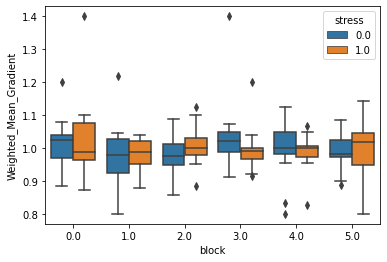

In [93]:
#here we can plot the WMG for each group in each block
sns.boxplot(data=grouped01, x="block", y="Weighted_Mean_Gradient", hue='stress')

In [92]:
pg.mixed_anova(data=grouped01, dv='Weighted_Mean_Gradient', subject='participant', within='block', between='stress')

Source        SS  DF1  DF2        MS         F     p-unc  p-GG-corr  \
0       stress  0.000001    1   29  0.000001  0.000131  0.990945        NaN   
1        block  0.028875    5  145  0.005775  1.041044  0.395900   0.380061   
2  Interaction  0.023886    5  145  0.004777  0.861149  0.508924        NaN   

        np2       eps sphericity   W-spher   p-spher  
0  0.000005       NaN        NaN       NaN       NaN  
1  0.034654  0.661969      False  0.338051  0.006723  
2  0.028838       NaN        NaN       NaN       NaN

### FOR WITHIN FACTOR AND BLOCK

In [96]:
new_df01.describe()

duration     feedback   noFeedback  Blocks.thisTrialN  \
count  3660.00000  3660.000000  3660.000000        3660.000000   
mean      1.00000     0.491803     0.508197           2.500000   
std       0.33471     0.500001     0.500001           1.708058   
min       0.40000     0.000000     0.000000           0.000000   
25%       0.80000     0.000000     0.000000           1.000000   
50%       1.00000     0.000000     1.000000           2.500000   
75%       1.20000     1.000000     1.000000           4.000000   
max       1.60000     1.000000     1.000000           5.000000   

       Block.thisTrialN    thisRow.t       stress     accuracy  \
count       3660.000000  2940.000000  3660.000000  3660.000000   
mean           4.500000   881.909375     0.508197     0.491803   
std            2.872674   489.360304     0.500001     0.500001   
min            0.000000   134.162586     0.000000     0.000000   
25%            2.000000   501.800691     0.000000     0.000000   
50%            4.500000   831.992258     1.000000     0.000000   
75%            7.000000  1156.342792     1.000000     1.000000   
max            9.000000  2888.305986     1.000000     1.000000   

       polygonBlackSquare.started  polygonBlackSquare.stopped  \
count                 3660.000000                 3435.000000   
mean                   881.497263                  883.192060   
std                    486.463570                  481.795163   
min                    133.079389                  133.479205   
25%                    500.648925                  505.325067   
50%                    824.594573                  830.235921   
75%                   1158.421877                 1164.331134   
max                   2887.007361                 2887.606766   

       key_respBorN.corr  key_respBorN.rt    participant  session          age  
count        3660.000000      3660.000000    3660.000000   3660.0  3660.000000  
mean            0.730601         2.056278  511267.672131      1.0    22.573770  
std             0.443708         9.550355  297657.221711      0.0     1.833093  
min             0.000000       -21.765640   27171.000000      1.0    21.000000  
25%             0.000000         1.415446  231280.000000      1.0    21.000000  
50%             1.000000         1.695342  572697.000000      1.0    22.000000  
75%             1.000000         2.020344  776689.000000      1.0    23.000000  
max             1.000000       525.046891  954504.000000      1.0    30.000000

In [99]:
#first we need to create new variable indicating in which halve of the experiment each measurement was acquired
new_df01['halve'] = np.where((new_df01['Blocks.thisTrialN'] >= 0) & (new_df01['Blocks.thisTrialN'] <= 2), 1,
                                np.where((new_df01['Blocks.thisTrialN'] >= 3) & (new_df01['Blocks.thisTrialN'] <= 5), 2, np.nan))

# Print the DataFrame to verify the new column
print(new_df01.head())

    duration corrAns  feedback  noFeedback  Blocks.thisTrialN  \
14       1.0       b       1.0         0.0                0.0   
15       0.8       n       1.0         0.0                0.0   
16       1.6       n       1.0         0.0                0.0   
17       0.6       n       1.0         0.0                0.0   
18       1.4       n       1.0         0.0                0.0   

    Block.thisTrialN   thisRow.t  stress  accuracy  \
14               0.0  160.033362     1.0       0.0   
15               1.0  167.613858     1.0       0.0   
16               2.0  175.680219     1.0       0.0   
17               3.0  183.186162     1.0       0.0   
18               4.0  191.197483     1.0       0.0   

    polygonBlackSquare.started  polygonBlackSquare.stopped key_respBorN.keys  \
14                  157.854946                  158.853922                 b   
15                  166.022553                  166.821131                 b   
16                  173.605768              

<ipython-input-99-9ecb5d7741de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df01['halve'] = np.where((new_df01['Blocks.thisTrialN'] >= 0) & (new_df01['Blocks.thisTrialN'] <= 2), 1,


In [102]:
#create new data frame with response ratios using the dataframe called new_df01 with your data you generated in the section 1

""""
Create a pivot table to calculate the counts of 'b' and 'n' for each group

we need to make the counts for each participant at each duration at each condition, 
so edit the code to contain your independent variables
my independent variables were 'feedback' and the halves of the experiment.
keep the variables 'duration' and 'participant' in the list
"""

pivot_table = new_df01.pivot_table(index=['duration', 'participant','feedback', "stress", 'halve'], columns='key_respBorN.keys', 
                                   aggfunc='size', fill_value=0)

# Calculate the Response Ratio (count of 'b' / count of 'n') for each group
pivot_table['Response_Ratio'] = pivot_table['b'] / (pivot_table['b'] + pivot_table['n'])

# Reset the index to have a new dataframe with the specified columns
result_df02 = pivot_table.reset_index()

# If you want to replace any NaN values with 0, you can use fillna method
result_df02.fillna(0, inplace=True)

# If you want to save this new dataframe to a CSV file, you can use:
#result_df02.to_csv("response_ratios.csv", index=False)


In [103]:
result_df02

key_respBorN.keys  duration  participant  feedback  stress  halve   b   n  \
0                       0.4      27171.0       0.0     1.0    1.0   1   2   
1                       0.4      27171.0       0.0     1.0    2.0   0   3   
2                       0.4      27171.0       1.0     1.0    1.0   1   2   
3                       0.4      27171.0       1.0     1.0    2.0   0   3   
4                       0.4      80551.0       0.0     0.0    1.0   1   2   
5                       0.4      80551.0       0.0     0.0    2.0   0   3   
6                       0.4      80551.0       1.0     0.0    1.0   2   1   
7                       0.4      80551.0       1.0     0.0    2.0   2   1   
8                       0.4      96604.0       0.0     1.0    1.0   0   3   
9                       0.4      96604.0       0.0     1.0    2.0   0   3   
10                      0.4      96604.0       1.0     1.0    1.0   0   3   
11                      0.4      96604.0       1.0     1.0    2.0   0   3   
12                      0.4     124367.0       0.0     0.0    1.0   2   1   
13                      0.4     124367.0       0.0     0.0    2.0   0   3   
14                      0.4     124367.0       1.0     0.0    1.0   0   3   
15                      0.4     124367.0       1.0     0.0    2.0   0   3   
16                      0.4     135784.0       0.0     0.0    1.0   0   3   
17                      0.4     135784.0       0.0     0.0    2.0   1   2   
18                      0.4     135784.0       1.0     0.0    1.0   1   2   
19                      0.4     135784.0       1.0     0.0    2.0   1   2   
20                      0.4     144507.0       0.0     0.0    1.0   0   3   
21                      0.4     144507.0       0.0     0.0    2.0   0   3   
22                      0.4     144507.0       1.0     0.0    1.0   0   3   
23                      0.4     144507.0       1.0     0.0    2.0   0   3   
24                      0.4     195972.0       0.0     0.0    1.0   0   3   
25                      0.4     195972.0       0.0     0.0    2.0   1   2   
26                      0.4     195972.0       1.0     0.0    1.0   0   3   
27                      0.4     195972.0       1.0     0.0    2.0   1   2   
28                      0.4     201266.0       0.0     1.0    1.0   0   3   
29                      0.4     201266.0       0.0     1.0    2.0   0   3   
30                      0.4     231280.0       0.0     0.0    1.0   0   3   
31                      0.4     231280.0       0.0     0.0    2.0   0   3   
32                      0.4     231280.0       1.0     0.0    1.0   2   1   
33                      0.4     231280.0       1.0     0.0    2.0   0   3   
34                      0.4     247059.0       0.0     1.0    1.0   0   3   
35                      0.4     247059.0       0.0     1.0    2.0   0   3   
36                      0.4     247059.0       1.0     1.0    1.0   0   3   
37                      0.4     247059.0       1.0     1.0    2.0   0   3   
38                      0.4     341031.0       0.0     0.0    1.0   0   3   
39                      0.4     341031.0       0.0     0.0    2.0   0   3   
40                      0.4     341031.0       1.0     0.0    1.0   0   3   
41                      0.4     341031.0       1.0     0.0    2.0   0   3   
42                      0.4     344553.0       0.0     1.0    1.0   0   3   
43                      0.4     344553.0       0.0     1.0    2.0   0   3   
44                      0.4     344553.0       1.0     1.0    1.0   0   3   
45                      0.4     344553.0       1.0     1.0    2.0   0   3   
46                      0.4     379479.0       0.0     1.0    1.0   0   3   
47                      0.4     379479.0       0.0     1.0    2.0   0   3   
48                      0.4     379479.0       1.0     1.0    1.0   0   3   
49                      0.4     379479.0       1.0     1.0    2.0   0   3   
50                      0.4     427694.0       0.0     1.0    1.0   0   3

In [106]:
# Assuming you have the 'result_df02' dataframe from the previous step

"""
We are replicating a procedure from Klapproth and Wearden, 2011
Here is citation from the paper, describing the construction of the parameter:

In order to numerically examine the shift of the
gradients, we calculated the weighted mean of the
gradient of each participant. 
This was done by 
[1]multiplying the number of “same” responses with the
duration at which a “same” response was given,
[2] adding these products, 
and then 
[4] dividing this weighted sum by the number of “same” responses
of each participant given at all durations (calculated at step [3] in our case)
"""


# [1] Calculate the weighted sum for each participant and duration combination (result_df02 already contains number of same responses as variable 'b')

result_df02['Weighted_Sum'] = result_df02['b'] * result_df02['duration']

# [2] Add the weighted sums to have a total for each combination of participant and values of your independent variables
""""
You will need to replace my independent variables by yours.
Keep the participant in the list, though.
"""
grouped02 = result_df02.groupby(['participant','stress','halve', 'feedback'])['Weighted_Sum'].sum().reset_index()

# [3] Calculate the total count of "b" responses for each participant and feedback combination
grouped02['Total_b_Responses'] = result_df02.groupby(['participant', 'feedback', 'halve'])['b'].transform('sum')

# [4] Calculate the weighted mean of the gradient for each participant and feedback combination
grouped02['Weighted_Mean_Gradient'] = grouped02['Weighted_Sum'] / grouped02['Total_b_Responses']

# If you want to save this new dataframe to a CSV file, you can use:
#grouped02.to_csv("weighted_mean_gradient.csv", index=False)



In [107]:
#in this version of final data frame for analysis, I have 2 measurements per participant
grouped02

participant  stress  halve  feedback  Weighted_Sum  Total_b_Responses  \
0        27171.0     1.0    1.0       0.0          11.8                 11   
1        27171.0     1.0    1.0       1.0          13.0                 10   
2        27171.0     1.0    2.0       0.0          10.6                 14   
3        27171.0     1.0    2.0       1.0          14.6                 14   
4        80551.0     0.0    1.0       0.0          10.0                 10   
5        80551.0     0.0    1.0       1.0           9.8                  5   
6        80551.0     0.0    2.0       0.0           5.4                 11   
7        80551.0     0.0    2.0       1.0          14.6                 15   
8        96604.0     1.0    1.0       0.0           8.6                  8   
9        96604.0     1.0    1.0       1.0          11.4                 18   
10       96604.0     1.0    2.0       0.0          18.6                 12   
11       96604.0     1.0    2.0       1.0          12.2                 12   
12      124367.0     0.0    1.0       0.0          14.4                 16   
13      124367.0     0.0    1.0       1.0           8.0                 13   
14      124367.0     0.0    2.0       0.0          14.0                  8   
15      124367.0     0.0    2.0       1.0          11.0                 11   
16      135784.0     0.0    1.0       0.0          11.2                 11   
17      135784.0     0.0    1.0       1.0          13.0                 20   
18      135784.0     0.0    2.0       0.0          18.6                 14   
19      135784.0     0.0    2.0       1.0          17.0                 17   
20      144507.0     0.0    1.0       0.0          15.4                 15   
21      144507.0     0.0    1.0       1.0           9.8                 15   
22      144507.0     0.0    2.0       0.0          14.8                 10   
23      144507.0     0.0    2.0       1.0          12.2                 13   
24      195972.0     0.0    1.0       0.0          15.2                 16   
25      195972.0     0.0    1.0       1.0          12.2                 10   
26      195972.0     0.0    2.0       0.0           9.4                 12   
27      195972.0     0.0    2.0       1.0          12.0                 13   
28      201266.0     1.0    1.0       0.0          13.8                 13   
29      201266.0     1.0    2.0       0.0          16.2                 15   
30      231280.0     0.0    1.0       0.0          11.6                 12   
31      231280.0     0.0    1.0       1.0           9.4                  7   
32      231280.0     0.0    2.0       0.0           6.8                 11   
33      231280.0     0.0    2.0       1.0          13.2                 13   
34      247059.0     1.0    1.0       0.0          11.4                 11   
35      247059.0     1.0    1.0       1.0          12.2                  9   
36      247059.0     1.0    2.0       0.0           9.2                 12   
37      247059.0     1.0    2.0       1.0          11.4                 11   
38      341031.0     0.0    1.0       0.0          11.8                 12   
39      341031.0     0.0    1.0       1.0          15.0                 16   
40      341031.0     0.0    2.0       0.0          17.8                 15   
41      341031.0     0.0    2.0       1.0          12.6                 13   
42      344553.0     1.0    1.0       0.0          16.0                 16   
43      344553.0     1.0    1.0       1.0          15.2                 16   
44      344553.0     1.0    2.0       0.0          16.8                 15   
45      344553.0     1.0    2.0       1.0          16.6                 17   
46      379479.0     1.0    1.0       0.0          19.6                 18   
47      379479.0     1.0    1.0       1.0          14.6                 16   
48      379479.0     1.0    2.0       0.0          16.8                 15   
49      379479.0     1.0    2.0       1.0          13.2                 13   
50      427694.0     1.0   

<AxesSubplot:xlabel='halve', ylabel='Weighted_Mean_Gradient'>

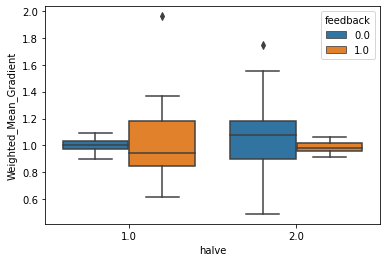

In [111]:
#here we can plot the WMG for each group in each block
sns.boxplot(data=grouped02, x="halve", y="Weighted_Mean_Gradient", hue='feedback')

In [117]:
# SKIP THIS TOO, UNLESS YOU WANT TO REMOVE A PARTICIPANT FROM THE RESULT_DF

# we create a subset of the data, excluding participant with incomplete experiment (SKIP THIS AT FIRST)
grouped02 = grouped02[grouped02['participant'] != 201266]

In [118]:
pg.rm_anova(data=grouped02, within=['halve', 'feedback'], dv='Weighted_Mean_Gradient', subject='participant')

Source        SS  ddof1  ddof2        MS          F     p-unc  \
0             halve  0.017686      1     29  0.017686   0.242395  0.626188   
1          feedback  0.044304      1     29  0.044304   0.583330  0.451179   
2  halve * feedback  0.046094      1     29  0.046094  10.005377  0.003646   

   p-GG-corr       np2  eps  
0   0.626188  0.008289  1.0  
1   0.451179  0.019718  1.0  
2   0.003646  0.256513  1.0

T  dof       tail     p-val         CI95%   cohen-d   BF10  \
T-test -0.014613   58  two-sided  0.988391  [-0.11, 0.1]  0.003773  0.262   

           power  
T-test  0.050024

WMG under no-feedback condition: 0.9988255589726179
WMG under feedback condition: 0.9995942303883478
mean difference: -0.0007686714157298935


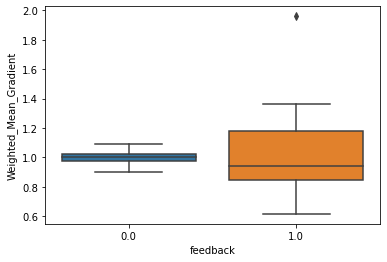

In [121]:
#ttest for within factor
data = grouped02[grouped02['halve'] == 1]

x = data[(data["feedback"]==0)]["Weighted_Mean_Gradient"]
y = data[(data["feedback"]==1)]["Weighted_Mean_Gradient"]
display(pg.ttest(x,y, paired=False))
sns.boxplot(data=data, x="feedback", y="Weighted_Mean_Gradient")
print("WMG under no-feedback condition:", x.mean())
print("WMG under feedback condition:", y.mean())
mean_diff = x.mean() - y.mean()
print("mean difference:", mean_diff)

T  dof       tail    p-val          CI95%   cohen-d   BF10  \
T-test  1.530334   58  two-sided  0.13137  [-0.02, 0.18]  0.395131  0.697   

           power  
T-test  0.324841

WMG under no-feedback condition: 1.0623034759358287
WMG under feedback condition: 0.984676364485188
mean difference: 0.07762711145064072


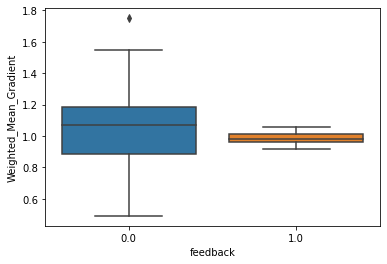

In [122]:
#ttest for within factor
data = grouped02[grouped02['halve'] == 2]

x = data[(data["feedback"]==0)]["Weighted_Mean_Gradient"]
y = data[(data["feedback"]==1)]["Weighted_Mean_Gradient"]
display(pg.ttest(x,y, paired=False))
sns.boxplot(data=data, x="feedback", y="Weighted_Mean_Gradient")
print("WMG under no-feedback condition:", x.mean())
print("WMG under feedback condition:", y.mean())
mean_diff = x.mean() - y.mean()
print("mean difference:", mean_diff)

In [119]:
pg.pairwise_ttests(data=grouped02, within=['halve', 'feedback'], dv='Weighted_Mean_Gradient', subject='participant', effsize='cohen')

Contrast halve  A  B Paired  Parametric         T   dof       Tail  \
0             halve     -  1  2   True        True -0.492337  29.0  two-sided   
1          feedback     -  0  1   True        True  0.763761  29.0  two-sided   
2  halve * feedback     1  0  1   True        True -0.014884  29.0  two-sided   
3  halve * feedback     2  0  1   True        True  1.492990  29.0  two-sided   

      p-unc   BF10     cohen  
0  0.626188  0.217 -0.172075  
1  0.451179  0.254  0.267380  
2  0.988227  0.194 -0.003773  
3  0.146241  0.527  0.395131

<AxesSubplot:xlabel='halve', ylabel='Weighted_Mean_Gradient'>

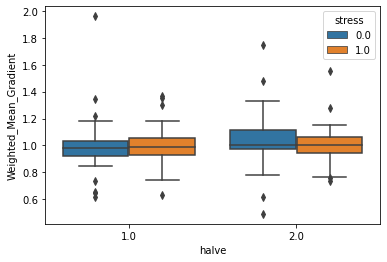

In [112]:
#here we can plot the WMG for each group in each block
sns.boxplot(data=grouped02, x="halve", y="Weighted_Mean_Gradient", hue='stress')